Dataset:- https://www.kaggle.com/datasets/altavish/boston-housing-dataset

# STEP 1: IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# STEP 2: LOAD DATASET

In [ ]:
df = pd.read_csv("./Datasets/Boston_Housing.csv")

In [ ]:
df.shape

(506, 14)

# STEP 3: BASIC EDA

In [ ]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.shape

(506, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
# check missing value

missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing,
    "Missing Percentage": missing_percentage
})

print(missing_df[missing_df["Missing Count"] > 0])

       Missing Count  Missing Percentage
CRIM              20            3.952569
ZN                20            3.952569
INDUS             20            3.952569
CHAS              20            3.952569
AGE               20            3.952569
LSTAT             20            3.952569


In [ ]:
# check for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

if len(categorical_columns) > 0:
  print(f"Categorical Columns FOund: {list(categorical_columns)}")
else:
  print(f"No Categorical Columns Found")

No Categorical Columns Found


In [ ]:
# Correlation with target

correlation = df.corr()['MEDV'].sort_values(ascending=False)
print(correlation)

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


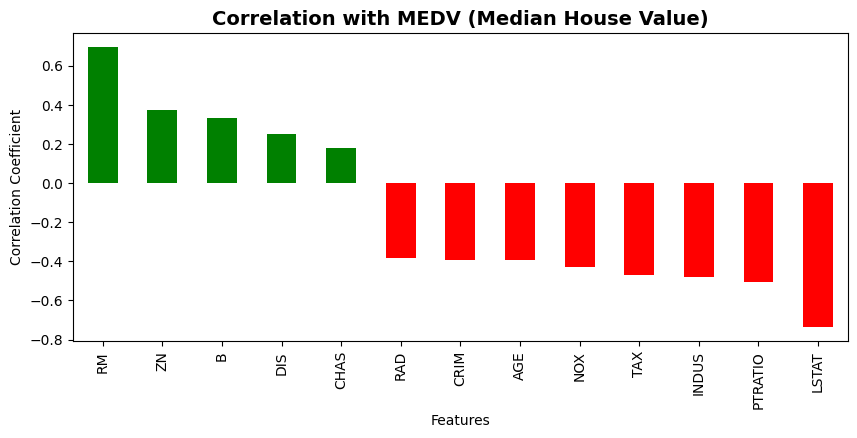

In [ ]:
# Visulize the correlation

plt.figure(figsize=(10,4))
correlation.drop('MEDV').plot(kind='bar', color=['green' if x > 0 else "red" for x in correlation.drop('MEDV')])

plt.title("Correlation with MEDV (Median House Value)", fontweight="bold", fontsize="14")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

# STEP 4: DATA PREPROCESSING

In [ ]:
# check Missing Value

print(f"Missing values Before: {missing_df}")

Missing values Before:          Missing Count  Missing Percentage
CRIM                20            3.952569
ZN                  20            3.952569
INDUS               20            3.952569
CHAS                20            3.952569
NOX                  0            0.000000
RM                   0            0.000000
AGE                 20            3.952569
DIS                  0            0.000000
RAD                  0            0.000000
TAX                  0            0.000000
PTRATIO              0            0.000000
B                    0            0.000000
LSTAT               20            3.952569
MEDV                 0            0.000000


In [ ]:
# fill all missing value with median values only (Numerical values)

new_missing_df = df.fillna(df.median(numeric_only=True), inplace=True)

print(f"Missing values After fill with median values: {new_missing_df}")

Missing values After fill with median values: None


In [ ]:
# Separate features and target

X = df.drop(['MEDV'], axis=1, errors='ignore')
y = df['MEDV']

In [ ]:
X.shape

(506, 13)

In [ ]:
y.shape

(506,)

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43


In [ ]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# STEP 5: TRAIN-TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
X_train.shape

(404, 13)

In [ ]:
X_test.shape

(102, 13)

In [ ]:
y_train.shape

(404,)

In [ ]:
y_test.shape

(102,)

# STEP 6: FEATURE SCALING (OPTIONAL - FOR COMPARISON)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [ ]:
X_train_scaler[0]

array([ 1.31113389, -0.47914112,  1.08544651, -0.27288841,  0.48925206,
       -1.42806858,  1.04842183, -0.80217296,  1.70689143,  1.57843444,
        0.84534281, -0.07433689,  1.79184271])

# STEP 7: XGBOOST WITH DEFAULT PARAMETERS

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
default_xgb = xgb.XGBRegressor(
    objective='reg:squarederror', # Regression Task
    n_jobs=  -1,
    random_state=42
)
default_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
default_xgb.score(X_test, y_test)

0.9255490003636344

In [ ]:
y_pred_default = default_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
default_r2 = r2_score(y_test, y_pred_default)
default_mse = mean_squared_error(y_test, y_pred_default)
default_mae = mean_absolute_error(y_test, y_pred_default)
default_rmse = np.sqrt(mean_squared_error(y_test, y_pred_default))

print(f"Default R2 Score: {default_r2:.4f}")
print(f"Default Mean Squared Error: {default_mse:.4f}")
print(f"Default Mean Absolute Error: {default_mae:.4f}")
print(f"Default RMSE: {default_rmse:.4f}")

Default R2 Score: 0.9255
Default Mean Squared Error: 5.4598
Default Mean Absolute Error: 1.8443
Default RMSE: 2.3366


# STEP 8: XGBOOST WITH SCALED DATA (FOR COMPARISON)

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
scaler_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)
scaler_xgb.fit(X_train_scaler, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
scaler_xgb.score(X_test_scaler, y_test)

0.9255490003636344

In [ ]:
y_pred_scaler = scaler_xgb.predict(X_test_scaler)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
scaler_r2 = r2_score(y_test, y_pred_scaler)
scaler_mse = mean_squared_error(y_test, y_pred_scaler)
scaler_mae = mean_absolute_error(y_test, y_pred_scaler)
scaler_rmse = np.sqrt(mean_squared_error(y_test, y_pred_scaler))

print(f"scaler R2 Score: {scaler_r2:.4f}")
print(f"scaler Mean Squared Error: {scaler_mse:.4f}")
print(f"scaler Mean Absolute Error: {scaler_mae:.4f}")
print(f"scaler RMSE: {scaler_rmse:.4f}")

scaler R2 Score: 0.9255
scaler Mean Squared Error: 5.4598
scaler Mean Absolute Error: 1.8443
scaler RMSE: 2.3366


# STEP 9: FEATURE IMPORTANCE ANALYSIS

In [ ]:
# Get feature importances

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': default_xgb.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n Feature Importance Ranking")
print(feature_importance)


 Feature Importance Ranking
    Feature  Importance
5        RM    0.439027
12    LSTAT    0.259892
7       DIS    0.056002
10  PTRATIO    0.052980
9       TAX    0.048890
4       NOX    0.048794
0      CRIM    0.033251
3      CHAS    0.014995
8       RAD    0.014159
6       AGE    0.010854
11        B    0.010417
2     INDUS    0.008307
1        ZN    0.002431


In [ ]:
print(f"Feature Importance shape: {feature_importance.shape}")
print("\nTop 5 Importnt Features:")
print(feature_importance.head())

Feature Importance shape: (13, 2)

Top 5 Importnt Features:
    Feature  Importance
5        RM    0.439027
12    LSTAT    0.259892
7       DIS    0.056002
10  PTRATIO    0.052980
9       TAX    0.048890


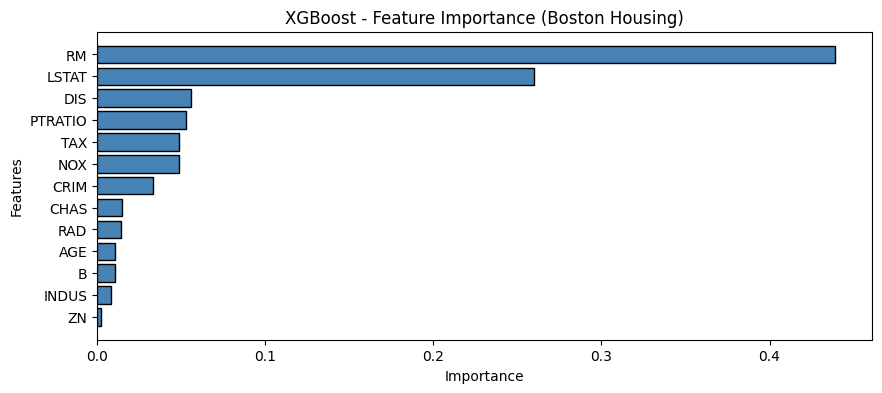

In [ ]:
# Visualize feature importance
plt.figure(figsize=(10,4))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue', edgecolor='black')
plt.title('XGBoost - Feature Importance (Boston Housing)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
# plt.grid(True, alpha=0.3, axis='x')
# plt.tight_layout()
plt.show()


# STEP 10: CROSS-VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_score = cross_val_score(default_xgb, X_train, y_train, cv=5, n_jobs=-1, scoring='r2')

print(f"CV R² Scores: {cv_score}")
print(f"Mean CV R²: {cv_score.mean():.4f} (+/- {cv_score.std():.4f})")

CV R² Scores: [0.82336281 0.65350439 0.83634217 0.81215976 0.77959864]
Mean CV R²: 0.7810 (+/- 0.0665)


# STEP 11: HYPERPARAMETER TUNING WITH RANDOMIZEDSEARCHCV

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# define parameter distributation

param_distributations = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 100],
    'learning_rate': uniform(0.1, 0.29),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 8),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 5),
    'reg_alpha': [0, 0.01, 0.1, 1, 10],  # L1 regularization
    'reg_lambda': [0, 0.01, 0.1, 1, 10]  # L2 Regularization
}


In [ ]:
print("\nRunning RandomizedSearchCV (30 iterations)...")
print("Expected time: 1-2 minutes (smaller dataset)...")

random_search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror',
                               random_state=42,
                               n_jobs=-1),
    param_distributions=param_distributations,
    n_iter=30,  # 30 random combinations
    cv = 5,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("\n--- Best Hyperparameters Found ---")
best_params = random_search.best_params_

for param, value in best_params.items():
  print(f"{param}: {value}")

print(f"Best R² Score: {random_search.best_score_:.4f}")


Running RandomizedSearchCV (30 iterations)...
Expected time: 1-2 minutes (smaller dataset)...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

--- Best Hyperparameters Found ---
colsample_bytree: 0.7541666010159664
gamma: 0.07983126110107097
learning_rate: 0.1669592094304232
max_depth: 6
min_child_weight: 7
n_estimators: 700
reg_alpha: 1
reg_lambda: 10
subsample: 0.9332779646944658
Best R² Score: 0.8399


In [ ]:
# Predict with best model

y_pred_tuned = random_search.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
tuned_r2 = r2_score(y_test, y_pred_tuned)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print("\n--- Tuned XGBoost Performance (Test Set) ---")
print(f"R² Score: {tuned_r2:.4f}")
print(f"MAE: ${tuned_mae:.2f}k")
print(f"RMSE: ${tuned_rmse:.2f}k")


--- Tuned XGBoost Performance (Test Set) ---
R² Score: 0.8770
MAE: $1.98k
RMSE: $3.00k


# STEP 12: EARLY STOPPING DEMONSTRATION

In [ ]:
print("Training XGBoost with early stopping...")

X_train_es, X_val_es, y_train_es, y_val_es = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

xgb_early_stop = xgb.XGBRegressor(
    **best_params,                  # Use best parameters from tuning
    early_stopping_rounds=20,       # stop if no improvement for 20 rounds
    random_state=42,
    n_jobs=-1
)

xgb_early_stop.fit(X_train_es, y_train_es,
                   eval_set=[(X_val_es, y_val_es)],
                   verbose=False
                   )

print(f"Best Iteration: {xgb_early_stop.best_iteration}")
print(f"Total Trees: {xgb_early_stop.n_estimators}")



Training XGBoost with early stopping...
Best Iteration: 101
Total Trees: 700


In [ ]:
# predict
y_pred_early_stop = xgb_early_stop.predict(X_test)

In [ ]:
# Evaluatation

early_r2 = r2_score(y_test, y_pred_early_stop)
early_mae = mean_absolute_error(y_test, y_pred_early_stop)
early_rmse = np.sqrt(mean_squared_error(y_test, y_pred_early_stop))

print(f"\nR² Score: {early_r2:.4f}")
print(f"MAE: ${early_mae:.2f}k")
print(f"RMSE: ${early_rmse:.2f}k")


R² Score: 0.8552
MAE: $2.16k
RMSE: $3.26k


# STEP 13: MODEL COMPARISON

In [ ]:
comparison = pd.DataFrame({
    'Model': ['XGBoost (Default)', 'XGBoost (Scaled)', 'XGBoost (Tuned)', 'XGBoost (Early Stop)'],
    'R² Score': [default_r2, scaler_r2, tuned_r2, early_r2],
    'MAE ($k)': [default_mae, scaler_mae, tuned_mae, early_mae],
    'RMSE ($k)': [default_rmse, scaler_rmse, tuned_rmse, early_rmse]
})

print(comparison.to_string(index=False))

best_idx = comparison['R² Score'].idxmax()
print(f"\n✓ Best Model: {comparison.loc[best_idx, 'Model']}")
print(f"✓ Best R² Score: {comparison.loc[best_idx, 'R² Score']:.4f}")

improvement = ((tuned_r2 - default_r2) / default_r2) * 100
print(f"✓ Improvement from tuning: {improvement:.2f}%")

               Model  R² Score  MAE ($k)  RMSE ($k)
   XGBoost (Default)  0.925549  1.844250   2.336616
    XGBoost (Scaled)  0.925549  1.844250   2.336616
     XGBoost (Tuned)  0.876966  1.982293   3.003760
XGBoost (Early Stop)  0.855154  2.164889   3.259158

✓ Best Model: XGBoost (Default)
✓ Best R² Score: 0.9255
✓ Improvement from tuning: -5.25%


# STEP 15: VISUALIZATIONS

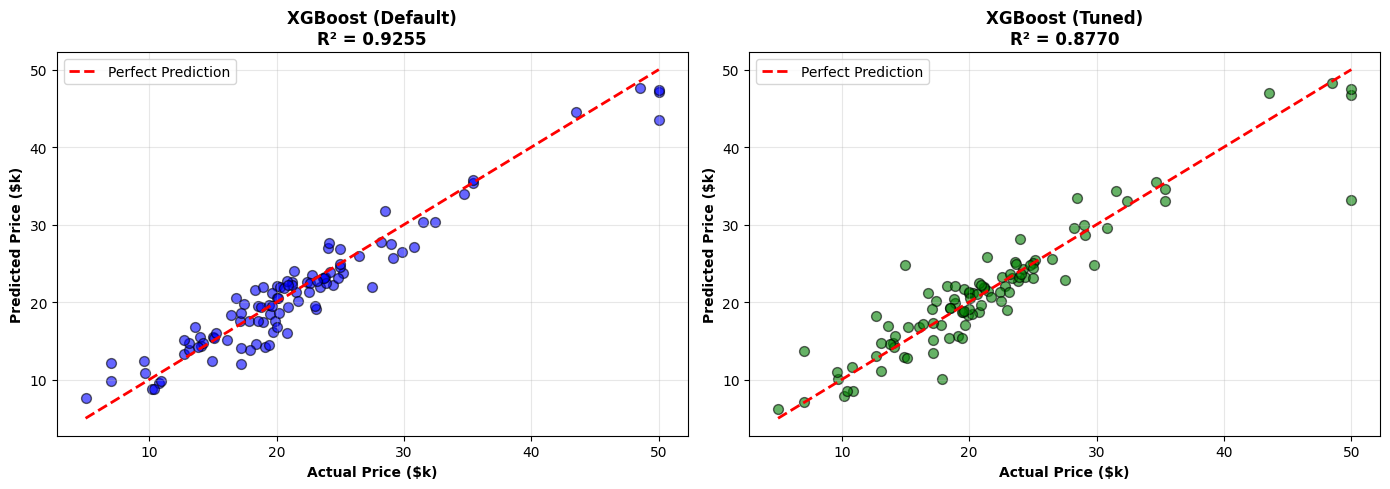

In [ ]:
# 15.1: Actual vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Default model
axes[0].scatter(y_test, y_pred_default, alpha=0.6, s=50, color='blue', edgecolor='black')
axes[0].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price ($k)', fontweight='bold')
axes[0].set_ylabel('Predicted Price ($k)', fontweight='bold')
axes[0].set_title(f'XGBoost (Default)\nR² = {default_r2:.4f}', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Tuned model
axes[1].scatter(y_test, y_pred_tuned, alpha=0.6, s=50, color='green', edgecolor='black')
axes[1].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price ($k)', fontweight='bold')
axes[1].set_ylabel('Predicted Price ($k)', fontweight='bold')
axes[1].set_title(f'XGBoost (Tuned)\nR² = {tuned_r2:.4f}', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


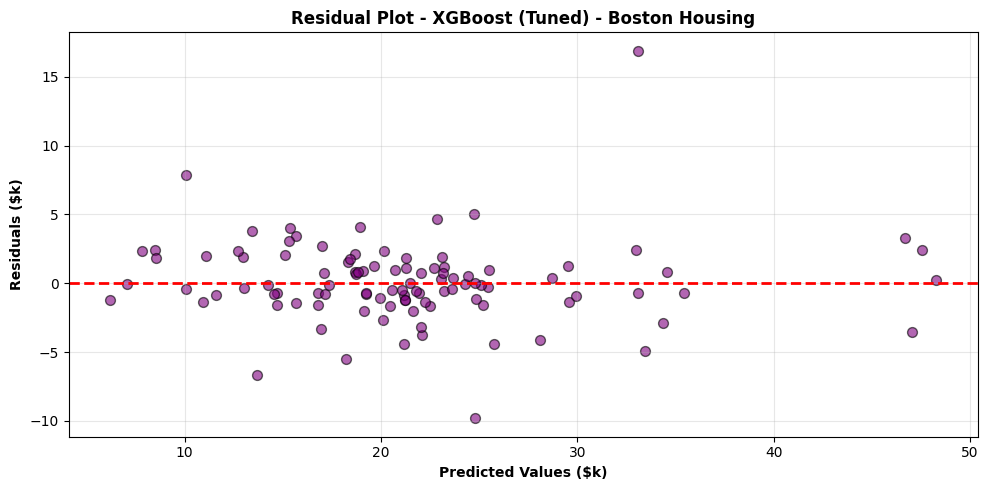

In [ ]:
# 15.2: Residual Plot
residuals = y_test - y_pred_tuned

plt.figure(figsize=(10, 5))
plt.scatter(y_pred_tuned, residuals, alpha=0.6, s=50, color='purple', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values ($k)', fontweight='bold')
plt.ylabel('Residuals ($k)', fontweight='bold')
plt.title('Residual Plot - XGBoost (Tuned) - Boston Housing', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


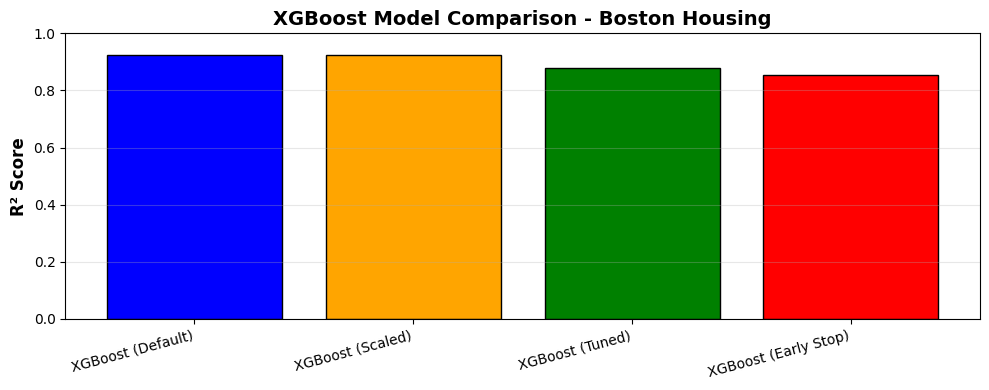

In [ ]:
# 15.3: Model Comparison Bar Chart
plt.figure(figsize=(10, 4))
plt.bar(comparison['Model'], comparison['R² Score'],
        color=['blue', 'orange', 'green', 'red'], edgecolor='black')
plt.ylabel('R² Score', fontweight='bold', fontsize=12)
plt.title('XGBoost Model Comparison - Boston Housing',
          fontweight='bold', fontsize=14)
plt.ylim([0, 1])
plt.xticks(rotation=15, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()